## CTSI-IT Pre Interview Assessment

## Problem Statement

A fairly common statement you may hear is that data becomes information, information becomes knowledge, 
and knowledge becomes wisdom. Our job is primarily involved in using computer code, mathematics and 
experience to convert data into information. To become information, the data must be taken 
from a source, transformed into input, processed by a set of algorithms, transformed into output, and delivered to a consumer.

Date math and basic exploratory data analysis using descriptive statistics are a corner 
stone of writing computer code to manage real world data that occurs in a longitudinal 
manner. The goal of this problem is to give you a simple data set to allow you to 
demonstrate your understanding of how to apply computer code to solve a problem and then further use computer code to communicate your new information to people.

Using the given data and Python or R; add new variables called year_of_birth, lived_years, 
lived_months, lived_days then make two well formatted output tables ranking the top 10 Presidents 
from longest lived to shortest lived and then the top 10 presidents from shortest lived to longest lived.

Then using your newly created data calculate the mean, weighted mean, median, mode, max, min and 
standard deviation of lived_days for your data set. Output these measures in a well formatted table.
Then, make a plot of a type that you think best shows the distribution of this data.

Assemble your tables and plot into a single report with a title, author and date. Start the 
report with a 3 or 4 sentence summary of what you found, the body should have your tables and 
plot and any commentary about your methods or assumptions you think the reader would need to know. 
Finish the report with a conclusions section, where you state the conclusions you reached through this analysis.

To finish commit all your code and your report to your personal Github repository and then email 
back CTS-IT with a link to your completed problem.

Good Luck!

References: https://eng.libretexts.org/Bookshelves/Industrial_and_Systems_Engineering/Book%3A_Chemical_Process_Dynamics_and_Controls_(Woolf)/13%3A_Statistics_and_Probability_Background/13.01%3A_Basic_statistics-_mean%2C_median%2C_average%2C_standard_deviation%2C_z-scores%2C_and_p-value

## Load Packages

## Import Data

In [194]:
import pandas as pd
url = (r'https://raw.githubusercontent.com/senrabc/a_problem_with_presidents/main/U.S.%20Presidents%20Birth%20and%20Death%20Information%20-%20Sheet1.csv')
df = pd.read_csv(url)
df.head(5)

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH
0,George Washington,"Feb 22, 1732","Westmoreland Co., Va.","Dec 14, 1799","Mount Vernon, Va."
1,John Adams,"Oct 30, 1735","Quincy, Mass.","July 4, 1826","Quincy, Mass."
2,Thomas Jefferson,"Apr 13, 1743","Albemarle Co., Va.","July 4, 1826","Albemarle Co., Va."
3,James Madison,"Mar 16, 1751","Port Conway, Va.","June 28, 1836","Orange Co., Va."
4,James Monroe,"Apr 28, 1758","Westmoreland Co., Va.","July 4, 1831","New York, New York"


## Describe data

In [138]:
df.describe()

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH
count,46,45,45,39,39
unique,46,45,41,38,29
top,George Washington,"Feb 22, 1732","Westmoreland Co., Va.","July 4, 1826","Washington, D.C."
freq,1,1,2,2,6


In [139]:
# show data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PRESIDENT          46 non-null     object
 1   BIRTH DATE         45 non-null     object
 2   BIRTH PLACE        45 non-null     object
 3   DEATH DATE         39 non-null     object
 4   LOCATION OF DEATH  39 non-null     object
dtypes: object(5)
memory usage: 1.9+ KB


In [140]:
df.tail(5)

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH
41,George W. Bush,"July 6, 1946","New Haven, Conn.",NaN,NaN
42,Barack Obama,"Aug 4, 1961","Honolulu, Hawaii",NaN,NaN
43,Donald Trump,"June 14, 1946","New York, New York",NaN,NaN
44,Joe Biden,"Nov 20, 1942","Scranton, Pa.",NaN,NaN
45,"Reference:\nBirthplace, Birthdate, and Death i...",NaN,NaN,NaN,NaN


In [198]:
#Drop last row - references
df.drop(df.tail(1).index, inplace=True)

In [199]:
#Here I format BIRT DATE and DEATH DATE variables to datetime
df["BIRTH_DATE"] = pd.to_datetime(df["BIRTH DATE"])
df["DEATH_DATE"] = pd.to_datetime(df["DEATH DATE"])

In [200]:
df

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,BIRTH_DATE,DEATH_DATE
0,George Washington,"Feb 22, 1732","Westmoreland Co., Va.","Dec 14, 1799","Mount Vernon, Va.",1732-02-22,1799-12-14
1,John Adams,"Oct 30, 1735","Quincy, Mass.","July 4, 1826","Quincy, Mass.",1735-10-30,1826-07-04
2,Thomas Jefferson,"Apr 13, 1743","Albemarle Co., Va.","July 4, 1826","Albemarle Co., Va.",1743-04-13,1826-07-04
3,James Madison,"Mar 16, 1751","Port Conway, Va.","June 28, 1836","Orange Co., Va.",1751-03-16,1836-06-28
4,James Monroe,"Apr 28, 1758","Westmoreland Co., Va.","July 4, 1831","New York, New York",1758-04-28,1831-07-04
5,John Quincy Adams,"July 11, 1767","Quincy, Mass.","Feb 23, 1848","Washington, D.C.",1767-07-11,1848-02-23
6,Andrew Jackson,"Mar 15, 1767","Waxhaws, No/So Carolina","June 8, 1845","Nashville, Tennessee",1767-03-15,1845-06-08
7,Martin Van Buren,"Dec 5, 1782","Kinderhook, New York","July 24, 1862","Kinderhook, New York",1782-12-05,1862-07-24
8,William Henry Harrison,"Feb 9, 1773","Charles City Co., Va.","Apr 4, 1841","Washington, D.C.",1773-02-09,1841-04-04
9,John Tyler,"Mar 29, 1790","Charles City Co., Va.","Jan 18, 1862","Richmond, Va.",1790-03-29,1862-01-18


## Some presidents are still alive as of today so replace their Death Date columns. 

In [144]:
today = pd.to_datetime("today").strftime("%Y-%m-%d")
today

'2022-05-12'

In [201]:
# From the set above, there are NaN and NaT's in the DEATH DATE columns of still living presidents, 
#so I replaced them with today's date.
df["DEATH_DATE"] = df["DEATH_DATE"].fillna(today)
df

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,BIRTH_DATE,DEATH_DATE
0,George Washington,"Feb 22, 1732","Westmoreland Co., Va.","Dec 14, 1799","Mount Vernon, Va.",1732-02-22,1799-12-14
1,John Adams,"Oct 30, 1735","Quincy, Mass.","July 4, 1826","Quincy, Mass.",1735-10-30,1826-07-04
2,Thomas Jefferson,"Apr 13, 1743","Albemarle Co., Va.","July 4, 1826","Albemarle Co., Va.",1743-04-13,1826-07-04
3,James Madison,"Mar 16, 1751","Port Conway, Va.","June 28, 1836","Orange Co., Va.",1751-03-16,1836-06-28
4,James Monroe,"Apr 28, 1758","Westmoreland Co., Va.","July 4, 1831","New York, New York",1758-04-28,1831-07-04
5,John Quincy Adams,"July 11, 1767","Quincy, Mass.","Feb 23, 1848","Washington, D.C.",1767-07-11,1848-02-23
6,Andrew Jackson,"Mar 15, 1767","Waxhaws, No/So Carolina","June 8, 1845","Nashville, Tennessee",1767-03-15,1845-06-08
7,Martin Van Buren,"Dec 5, 1782","Kinderhook, New York","July 24, 1862","Kinderhook, New York",1782-12-05,1862-07-24
8,William Henry Harrison,"Feb 9, 1773","Charles City Co., Va.","Apr 4, 1841","Washington, D.C.",1773-02-09,1841-04-04
9,John Tyler,"Mar 29, 1790","Charles City Co., Va.","Jan 18, 1862","Richmond, Va.",1790-03-29,1862-01-18


## Create new variables

In [205]:
#year_of_Birth using the datetime module
year_of_birth = df["BIRTH_DATE"].dt.year

In [207]:
lived_days = (df["DEATH_DATE"] - df["BIRTH_DATE"]).dt.days   #lived_days 
lived_years = round((df["DEATH_DATE"] - df["BIRTH_DATE"]).dt.days / 365, 1) #lived_years
lived_months = round((df["DEATH_DATE"] - df["BIRTH_DATE"]).dt.days / 30.5, 1) #lived_months

#Add lived variables to dataframe
df["LIVED_YEARS"] = lived_years
df["LIVED_MONTHS"] = lived_months
df["LIVED_DAYS"] = lived_days
df

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,BIRTH_DATE,DEATH_DATE,LIVED_YEARS,LIVED_MONTHS,LIVED_DAYS
0,George Washington,"Feb 22, 1732","Westmoreland Co., Va.","Dec 14, 1799","Mount Vernon, Va.",1732-02-22,1799-12-14,67.9,812.0,24767
1,John Adams,"Oct 30, 1735","Quincy, Mass.","July 4, 1826","Quincy, Mass.",1735-10-30,1826-07-04,90.7,1085.9,33119
2,Thomas Jefferson,"Apr 13, 1743","Albemarle Co., Va.","July 4, 1826","Albemarle Co., Va.",1743-04-13,1826-07-04,83.3,996.6,30397
3,James Madison,"Mar 16, 1751","Port Conway, Va.","June 28, 1836","Orange Co., Va.",1751-03-16,1836-06-28,85.3,1021.3,31150
4,James Monroe,"Apr 28, 1758","Westmoreland Co., Va.","July 4, 1831","New York, New York",1758-04-28,1831-07-04,73.2,876.4,26729
5,John Quincy Adams,"July 11, 1767","Quincy, Mass.","Feb 23, 1848","Washington, D.C.",1767-07-11,1848-02-23,80.7,965.4,29446
6,Andrew Jackson,"Mar 15, 1767","Waxhaws, No/So Carolina","June 8, 1845","Nashville, Tennessee",1767-03-15,1845-06-08,78.3,936.9,28574
7,Martin Van Buren,"Dec 5, 1782","Kinderhook, New York","July 24, 1862","Kinderhook, New York",1782-12-05,1862-07-24,79.7,953.6,29085
8,William Henry Harrison,"Feb 9, 1773","Charles City Co., Va.","Apr 4, 1841","Washington, D.C.",1773-02-09,1841-04-04,68.2,816.1,24890
9,John Tyler,"Mar 29, 1790","Charles City Co., Va.","Jan 18, 1862","Richmond, Va.",1790-03-29,1862-01-18,71.9,859.9,26227


In [220]:
#Keep Variables
df = df[['PRESIDENT', 'BIRTH_DATE', 'BIRTH PLACE','DEATH_DATE', 'LOCATION OF DEATH','LIVED_YEARS','LIVED_MONTHS','LIVED_DAYS']]
df

,PRESIDENT,BIRTH_DATE,BIRTH PLACE,DEATH_DATE,LOCATION OF DEATH,LIVED_YEARS,LIVED_MONTHS,LIVED_DAYS
0,George Washington,1732-02-22,"Westmoreland Co., Va.",1799-12-14,"Mount Vernon, Va.",67.9,812.0,24767
1,John Adams,1735-10-30,"Quincy, Mass.",1826-07-04,"Quincy, Mass.",90.7,1085.9,33119
2,Thomas Jefferson,1743-04-13,"Albemarle Co., Va.",1826-07-04,"Albemarle Co., Va.",83.3,996.6,30397
3,James Madison,1751-03-16,"Port Conway, Va.",1836-06-28,"Orange Co., Va.",85.3,1021.3,31150
4,James Monroe,1758-04-28,"Westmoreland Co., Va.",1831-07-04,"New York, New York",73.2,876.4,26729
5,John Quincy Adams,1767-07-11,"Quincy, Mass.",1848-02-23,"Washington, D.C.",80.7,965.4,29446
6,Andrew Jackson,1767-03-15,"Waxhaws, No/So Carolina",1845-06-08,"Nashville, Tennessee",78.3,936.9,28574
7,Martin Van Buren,1782-12-05,"Kinderhook, New York",1862-07-24,"Kinderhook, New York",79.7,953.6,29085
8,William Henry Harrison,1773-02-09,"Charles City Co., Va.",1841-04-04,"Washington, D.C.",68.2,816.1,24890
9,John Tyler,1790-03-29,"Charles City Co., Va.",1862-01-18,"Richmond, Va.",71.9,859.9,26227


## Table One - Rank of Top 10 President longest lived to shortest lived.

In [221]:
#sort ascending = false ie descending
table_1 = df.sort_values("LIVED_YEARS", ascending=False).head(10).style.hide_index().format({"LIVED_YEARS": "{:.1f}", "LIVED_MONTHS": "{:.1f}", "LIVED_DAYS": "{:.1f}"})
table_1

PRESIDENT,BIRTH_DATE,BIRTH PLACE,DEATH_DATE,LOCATION OF DEATH,LIVED_YEARS,LIVED_MONTHS,LIVED_DAYS
Jimmy Carter,1924-10-01 00:00:00,"Plains, Georgia",2022-05-12 00:00:00,nan,97.7,1168.9,35652.0
George Bush,1924-06-12 00:00:00,"Milton, Mass.",2018-11-30 00:00:00,"Houston, Texas",94.5,1131.3,34504.0
Gerald Ford,1913-07-14 00:00:00,"Omaha, Nebraska",2006-12-26 00:00:00,"Rancho Mirage, Cal.",93.5,1119.1,34133.0
Ronald Reagan,1911-02-06 00:00:00,"Tampico, Illinois",2004-06-05 00:00:00,"Los Angeles, Cal.",93.4,1117.6,34088.0
John Adams,1735-10-30 00:00:00,"Quincy, Mass.",1826-07-04 00:00:00,"Quincy, Mass.",90.7,1085.9,33119.0
Herbert Hoover,1874-08-10 00:00:00,"West Branch, Iowa",1964-10-20 00:00:00,"New York, New York",90.3,1080.1,32943.0
Harry S. Truman,1884-05-08 00:00:00,"Lamar, Missouri",1972-12-26 00:00:00,"Kansas City, Missouri",88.7,1061.4,32373.0
James Madison,1751-03-16 00:00:00,"Port Conway, Va.",1836-06-28 00:00:00,"Orange Co., Va.",85.3,1021.3,31150.0
Thomas Jefferson,1743-04-13 00:00:00,"Albemarle Co., Va.",1826-07-04 00:00:00,"Albemarle Co., Va.",83.3,996.6,30397.0
Richard Nixon,1913-01-09 00:00:00,"Yorba Linda, Cal.",1994-04-22 00:00:00,"New York, New York",81.3,973.4,29688.0


## Table Two - Rank of Top 10 President shortest lived to longest lived.

In [222]:
#sort Ascending
table_2 = df.sort_values("LIVED_YEARS", ascending=True).head(10).style.hide_index().format({"LIVED_YEARS": "{:.1f}", "LIVED_MONTHS": "{:.1f}", "LIVED_DAYS": "{:.1f}"})
table_2

PRESIDENT,BIRTH_DATE,BIRTH PLACE,DEATH_DATE,LOCATION OF DEATH,LIVED_YEARS,LIVED_MONTHS,LIVED_DAYS
John F. Kennedy,1917-05-29 00:00:00,"Brookline, Mass.",1963-11-22 00:00:00,"Dallas, Texas",46.5,556.7,16978.0
James A. Garfield,1831-11-19 00:00:00,"Cuyahoga Co., Ohio",1881-09-19 00:00:00,"Elberon, New Jersey",49.9,596.8,18202.0
James K. Polk,1795-11-02 00:00:00,"Mecklenburg Co., N.C.",1849-06-15 00:00:00,"Nashville, Tennessee",53.7,642.1,19583.0
Abraham Lincoln,1809-02-12 00:00:00,"LaRue Co., Kentucky",1865-04-15 00:00:00,"Washington, D.C.",56.2,672.7,20516.0
Chester Arthur,1829-10-05 00:00:00,"Fairfield, Vermont",1886-11-18 00:00:00,"New York, New York",57.2,684.0,20863.0
Warren G. Harding,1865-11-02 00:00:00,"Morrow County, Ohio",1923-08-02 00:00:00,"San Francisco, Cal.",57.8,691.5,21091.0
William McKinley,1843-01-29 00:00:00,"Niles, Ohio",1901-09-14 00:00:00,"Buffalo, New York",58.7,702.0,21412.0
Theodore Roosevelt,1858-10-27 00:00:00,"New York, New York",1919-01-06 00:00:00,"Oyster Bay, New York",60.2,720.8,21985.0
Calvin Coolidge,1872-07-04 00:00:00,"Plymouth, Vermont",1933-01-05 00:00:00,"Northampton, Mass.",60.5,724.6,22099.0
Barack Obama,1961-08-04 00:00:00,"Honolulu, Hawaii",2022-05-12 00:00:00,nan,60.8,727.7,22196.0


## Table Three - Rank of current living presidents by age.

In [223]:
# Age of living presidents
current = df[df['DEATH_DATE'] == "2022-05-12" ]
current.sort_values("LIVED_YEARS", ascending=False).style.hide_index().format({"LIVED_YEARS": "{:.1f}", "LIVED_MONTHS": "{:.1f}", "LIVED_DAYS": "{:.1f}"})

PRESIDENT,BIRTH_DATE,BIRTH PLACE,DEATH_DATE,LOCATION OF DEATH,LIVED_YEARS,LIVED_MONTHS,LIVED_DAYS
Jimmy Carter,1924-10-01 00:00:00,"Plains, Georgia",2022-05-12 00:00:00,nan,97.7,1168.9,35652.0
Joe Biden,1942-11-20 00:00:00,"Scranton, Pa.",2022-05-12 00:00:00,nan,79.5,951.7,29028.0
Donald Trump,1946-06-14 00:00:00,"New York, New York",2022-05-12 00:00:00,nan,76.0,909.0,27726.0
George W. Bush,1946-07-06 00:00:00,"New Haven, Conn.",2022-05-12 00:00:00,nan,75.9,908.3,27704.0
Bill Clinton,1946-08-19 00:00:00,"Hope, Arkansas",2022-05-12 00:00:00,nan,75.8,906.9,27660.0
Barack Obama,1961-08-04 00:00:00,"Honolulu, Hawaii",2022-05-12 00:00:00,nan,60.8,727.7,22196.0


In [225]:
import dataframe_image as dfi
# Export the table as png
dfi.export(df.sort_values("LIVED_YEARS", ascending=True).head(10).style.hide_index().format({"LIVED_YEARS": "{:.1f}", "LIVED_MONTHS": "{:.1f}", "LIVED_DAYS": "{:.1f}"}), "shortest_lived_Presidents.png")

dfi.export(df.sort_values("LIVED_YEARS", ascending=False).head(10).style.hide_index().format({"LIVED_YEARS": "{:.1f}", "LIVED_MONTHS": "{:.1f}", "LIVED_DAYS": "{:.1f}"}), "longest_lived_Presidents.png")


In [226]:
# Find mean
mean = df["LIVED_DAYS"].mean()

# Find weighted mean
# Same as mean as every lived days value is unique? 
weighted_mean = df["LIVED_DAYS"].mean()

# Find meadian
median = df["LIVED_DAYS"].median()

# Find mode
# No presidents lived the same number of days
mode = df["LIVED_DAYS"].mode()[0]

# Find max
max = df["LIVED_DAYS"].max()

# Find min
min = df["LIVED_DAYS"].min()

# Find standard deviation
std = df["LIVED_DAYS"].std()

In [227]:
# Create table with new data
calculations_data = {"MEAN": mean, "WEIGHTED MEAN": weighted_mean, "MEDIAN": median, "MODE": mode, "MAX": max, "MIN": min, "SD": std}
calculations_df = pd.DataFrame(data=calculations_data, index=[0]).style.hide_index()
calculations_df

MEAN,WEIGHTED MEAN,MEDIAN,MODE,MAX,MIN,SD
26394.577778,26394.577778,26227.000000,16978,35652,16978,4576.392697


In [166]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

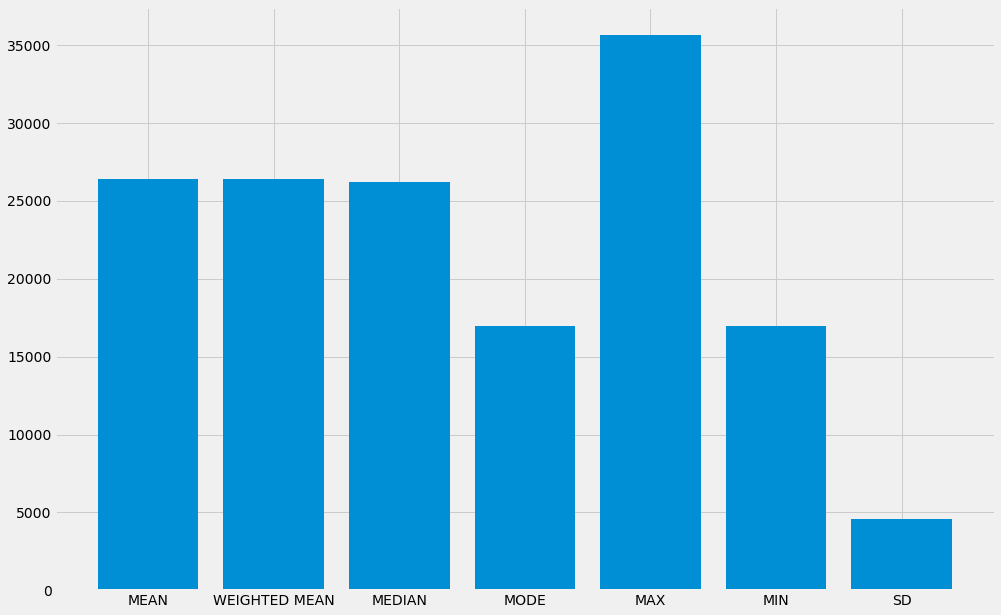

In [228]:
import matplotlib.pyplot as plt
# Setting FiveThirtyEight style
plt.style.use('fivethirtyeight')
# Create bar graph and output it to .png
plot_data = [mean, weighted_mean, median, mode, max, min, std]
plt.figure(figsize=(15, 10))
plt.bar(["MEAN", "WEIGHTED MEAN", "MEDIAN", "MODE", "MAX", "MIN", "SD"], plot_data)
plt.savefig("bar_graph.png")
plt.show()